In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

import random

random.seed(666)

In [2]:
ratings = pd.read_csv('data/ratings.csv')
wide = ratings.pivot(index = 'userId', columns = 'movieId', values = 'rating')
wide.fillna(wide.median(), inplace = True)
sc = StandardScaler()
X = sc.fit_transform(wide)

In [3]:
pca = PCA(n_components=19)
pca.fit(X)
T = pca.transform(X)

In [4]:
n_components = np.arange(15, 45)
models = [GaussianMixture(n, covariance_type='full', random_state=666, verbose = 0).fit(T)
          for n in n_components]

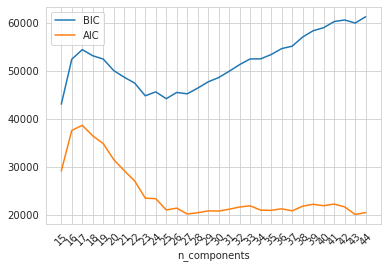

In [5]:
plt.plot(n_components, [m.bic(T) for m in models], label='BIC')
plt.plot(n_components, [m.aic(T) for m in models], label='AIC')
plt.legend(loc='best')
plt.xticks(np.arange(15, 45, step=1), rotation=45)
plt.xlabel('n_components');

In [6]:
# despite the random states and the seed GMM results vary
# the most elbowy shape is always between 22-25, though
# why not 23

In [7]:
gmm = GaussianMixture(n_components=23, random_state=666).fit(T)
labels = gmm.predict(T)
# plt.scatter(T[:, 0], T[:, 1], c=labels, s=40, cmap='viridis');

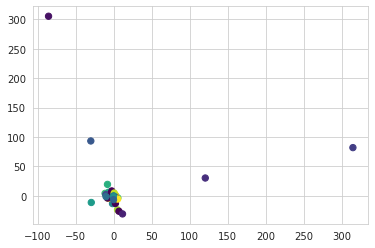

In [8]:
plt.scatter(T[:, 2], T[:, 3], c=labels, s=40, cmap='viridis');

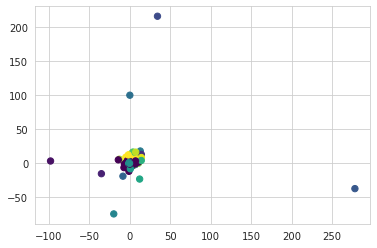

In [9]:
plt.scatter(T[:, 4], T[:, 5], c=labels, s=40, cmap='viridis');

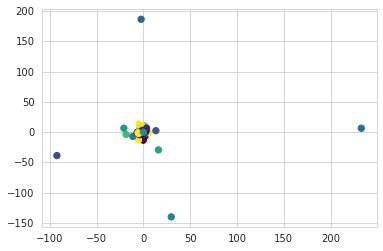

In [10]:
plt.scatter(T[:, 6], T[:, 7], c=labels, s=40, cmap='viridis');

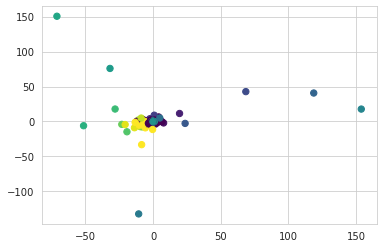

In [11]:
plt.scatter(T[:, 8], T[:, 9], c=labels, s=40, cmap='viridis');

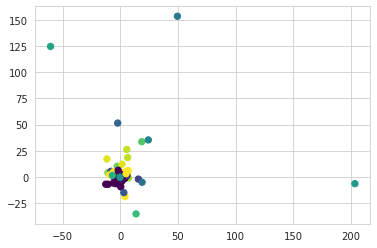

In [12]:
plt.scatter(T[:, 10], T[:, 11], c=labels, s=40, cmap='viridis');

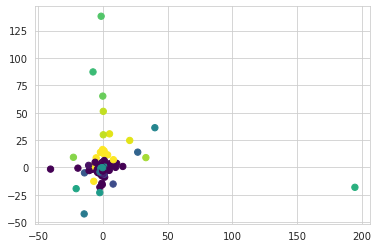

In [13]:
plt.scatter(T[:, 12], T[:, 13], c=labels, s=40, cmap='viridis');

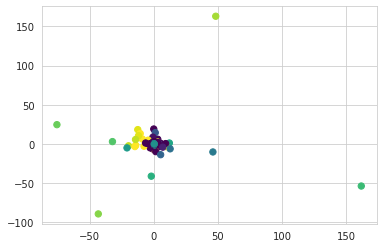

In [14]:
plt.scatter(T[:, 14], T[:, 15], c=labels, s=40, cmap='viridis');

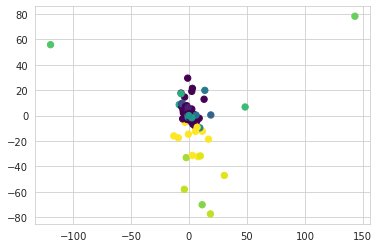

In [15]:
plt.scatter(T[:, 16], T[:, 17], c=labels, s=40, cmap='viridis');

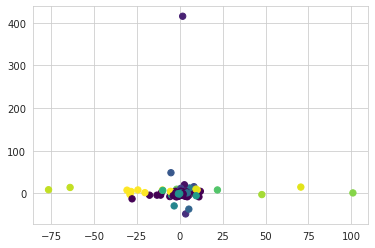

In [16]:
plt.scatter(T[:, 18], T[:, 0], c=labels, s=40, cmap='viridis');